In [1]:
library(brms)
library(tidyverse)
library(ggpubr)


Loading required package: Rcpp

Loading 'brms' package (version 2.18.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
N <- 100
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) x
h_2 <- function(x) -x
f <- function(x) 3*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(2, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

## brms

### Similar model, but we know X

In [4]:
data <- as.data.frame(t(rbind(Z,X,W,Y)))
names(data) <- c("Z1", "Z2", "X","W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

In [7]:
data$S <- as.numeric(NA)

bf1 <- bf(X ~ Z1 + Z2)
bf2 <- bf(S|mi() ~ X + Z1 + Z2)
bf3 <- bf(Y1 ~ 0 + mi(S))
bf4 <- bf(Y2 ~ 0 + mi(S))
bf5 <- bf(Y3 ~ 0 + mi(S))

model <- brm(bf1 + bf2 + bf3 + bf4 + bf5 +set_rescor(FALSE), 
data = data, family = gaussian(), 
iter = 2000, chains = 2, cores = 4, seed = 123)

Compiling Stan program...

Start sampling

Warning message:
“There were 14 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 23 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.91, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the cha

In [8]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 14 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X_Intercept,-0.005919928,0.01082774,-0.02704398,0.01511037,1.0014065,2170.488797,1258.10245
S_Intercept,-0.001750507,0.12329184,-0.24305121,0.23369073,1.0008617,2217.909390,966.56719
X_Z1,-1.022456292,0.02045437,-1.06338806,-0.98218949,1.0009862,2120.445830,1462.39569
X_Z2,0.982570504,0.01949562,0.94438596,1.02066131,0.9995401,1837.487585,1509.61059
S_X,-0.138892703,2.76613407,-5.28667793,4.59801184,1.8347512,2.906989,39.68795
S_Z1,-0.060480800,1.21567477,-2.76423500,2.21445812,1.0129073,629.866644,272.07689
S_Z2,0.078875631,1.29488183,-2.29108720,2.81491878,1.1263887,11.556047,183.95407
Y1_miS,0.070135721,2.11539940,-3.06808403,3.32081249,1.8846987,2.857763,33.39415
Y2_miS,0.070094111,2.11709712,-3.07304412,3.31670768,1.8846561,2.857338,32.04492


### Simpler model

In [2]:
N <- 100
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) 0
h_2 <- function(x) 0
f <- function(x) 2*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(2, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

In [7]:
data$S <- as.numeric(NA)

bf1 <- bf(X ~ 0 + mi(S))
bf2 <- bf(S|mi() ~ 0)
bf3 <- bf(Y1 ~ 0 + mi(S)+X)

model <- brm(bf1 + bf2 + bf3 + set_rescor(FALSE), 
data = data, family = gaussian(), 
iter = 4000, chains = 2, cores = 4, seed = 123)

Compiling Stan program...

Start sampling

Warning message:
“There were 173 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 588 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 2.06, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the c

In [18]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 13 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X_miS,8.053318,8.704083,0.2242647,25.28698,1.838904,2.966027,12.50381
Y1_miS,37.166414,40.040645,1.0447512,110.62777,1.828760,2.959538,15.07232


`geom_smooth()` using formula = 'y ~ x'


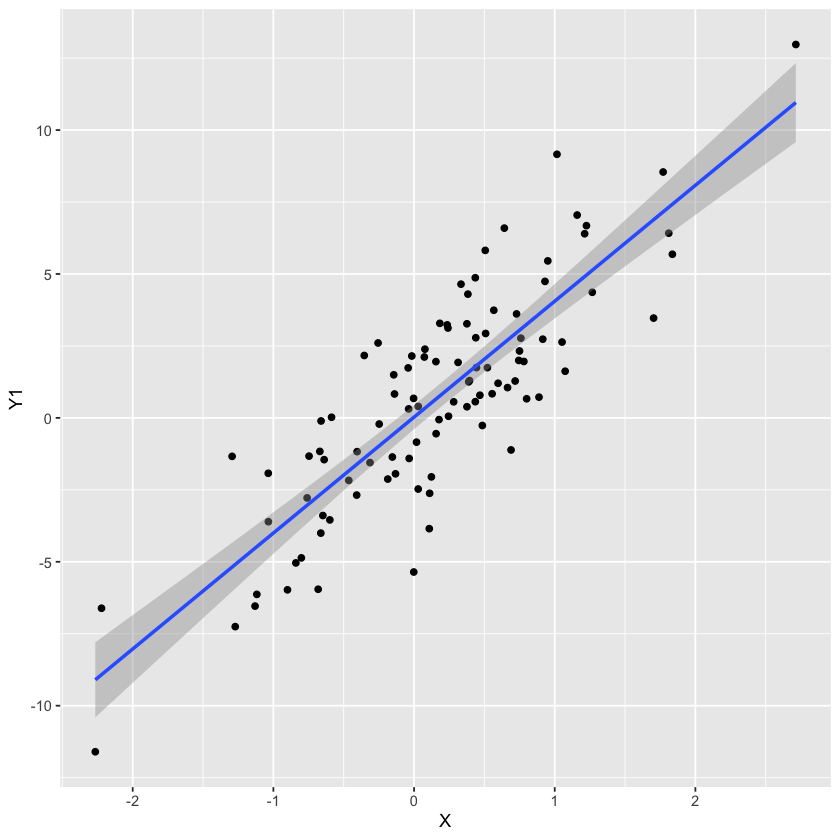

In [14]:
ggplot(data, aes(x = X, y = Y1)) + geom_point() + geom_smooth(method = "lm")

In [6]:
head(data)

,Z1,Z2,X,W1,W2,W3,W4,Y1,Y2,Y3,S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.27170609,0.71894763,0.98143110,1.00030098,0.77144801,1.2386757,1.0927794,1.9747777,1.9017684,2.0724796,NA
2,0.01679963,-0.11344792,0.02089102,0.06510267,-0.01048308,-0.1879640,0.3158062,-3.9140555,-3.7372067,-4.0432072,NA
3,-0.05534801,0.48256068,0.65339731,1.03600579,0.76622797,0.4936952,0.7088999,5.3465960,5.1435283,5.2003860,NA
4,-0.01107550,-0.77258435,-0.90910136,-0.91897396,-0.89855286,-0.7525232,-0.7067591,-5.3098412,-5.2066074,-5.2076106,NA
5,-0.27895880,0.01266895,0.31999997,0.47764206,0.19120549,0.5628556,0.3980963,-0.8141446,-0.6411995,-0.6839457,NA
6,0.19648555,1.53590359,1.52326754,1.49186037,1.34454041,1.5129694,1.2369527,8.1288171,8.1295000,8.2306673,NA


In [9]:
cat(stancode(model))

// generated with brms 2.18.0
functions {
}
data {
  int<lower=1> N;  // total number of observations
  int<lower=1> N_X;  // number of observations
  vector[N_X] Y_X;  // response variable
  int<lower=1> Ksp_X;  // number of special effects terms
  int<lower=1> N_S;  // number of observations
  vector[N_S] Y_S;  // response variable
  int<lower=0> Nmi_S;  // number of missings
  int<lower=1> Jmi_S[Nmi_S];  // positions of missings
  int<lower=1> N_Y1;  // number of observations
  vector[N_Y1] Y_Y1;  // response variable
  int<lower=1> K_Y1;  // number of population-level effects
  matrix[N_Y1, K_Y1] X_Y1;  // population-level design matrix
  int<lower=1> Ksp_Y1;  // number of special effects terms
  int prior_only;  // should the likelihood be ignored?
}
transformed data {
}
parameters {
  vector[Ksp_X] bsp_X;  // special effects coefficients
  real<lower=0> sigma_X;  // dispersion parameter
  vector[Nmi_S] Ymi_S;  // estimated missings
  real<lower=0> sigma_S;  // dispersion paramete